In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Considerando a base de dados de enem_2023.json responda as questões
abaixo (os dados são fictícios).

Você é uma pesquisadora de um cursinho para estudantes que querem
ingressar na universidade em 2025. Seu objetivo é retirar informações da
base de dados do enem do ano anterior para alinhar melhor as estratégias do
cursinho para cada estudante.
O dado possui 6 colunas, 5 delas representam as disciplinas do ENEM e uma o
gênero das pessoas que fizeram a prova. No dado existe a representação de
1000 pessoas, sendo cada uma delas uma linha.


In [4]:
df_enem=pd.read_json('/content/drive/MyDrive/arquivos .csv/enem_2023.json')
df_enem.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem


In [5]:
# Verificando quais são as colunas e que tipos de dados estão inseridos
df_enem.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Linguagens            897 non-null    float64
 1   Ciências humanas      936 non-null    float64
 2   Ciências da natureza  824 non-null    float64
 3   Matemática            924 non-null    float64
 4   Redação               860 non-null    float64
 5   Sexo                  1000 non-null   object 
dtypes: float64(5), object(1)
memory usage: 54.7+ KB


Através do método info( ) já é possível verificar que as colunas Linguagens, Ciências humanas, Ciências da natureza, Matemátia e Redação possuem valores faltantes/nulos. Também podemos notar que a única coluna que possui variáveis categóricas é a Sexo, enquanto as outras possuem variáveis numéricas

In [6]:
df_enem.describe()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
count,897.000000,936.000000,824.000000,924.000000,860.000000
mean,514.524809,527.042281,499.315583,535.965660,637.783532
std,84.009313,77.811519,78.760404,86.648100,115.339972
min,287.000000,289.900000,314.400000,319.800000,270.839965
25%,458.360558,475.424546,444.709076,479.172971,556.468366
50%,515.045250,524.519920,500.479263,533.247767,635.273973
75%,571.635876,581.401952,548.751678,592.912963,715.989868
max,804.456317,763.919695,802.004568,807.877902,1000.000000


In [7]:
# verificando quantos valores faltosos/nulos cada coluna possui
df_enem.isna().sum()

,0
Linguagens,103
Ciências humanas,64
Ciências da natureza,176
Matemática,76
Redação,140
Sexo,0


1. Qual das disciplinas tem a maior amplitude de nota?


In [8]:
# criando uma função para calcular a amplitude das colunas e retornar o valor da amplitude ordenada de forma decrescente
def amplitude_materia(df):
  estatistica=df.describe()
  estatistica.loc['Amplitude']=estatistica.loc['max']-estatistica.loc['min']
  return estatistica.loc['Amplitude'].sort_values(ascending=False)

In [9]:
ampli1=amplitude_materia(df_enem)
print(ampli1)

Redação                 729.160035
Linguagens              517.456317
Matemática              488.077902
Ciências da natureza    487.604568
Ciências humanas        474.019695
Name: Amplitude, dtype: float64


A disciplina com maior amplitude de notas é a de Redação

2. Qual é a média e a mediana para cada uma das disciplinas? (Lembre-se
de remover todos os valores nulos quando considerar a mediana)


In [10]:
# Calculando a média de cada coluna
media=df_enem.mean(numeric_only=True)
print(media)

Linguagens              514.524809
Ciências humanas        527.042281
Ciências da natureza    499.315583
Matemática              535.965660
Redação                 637.783532
dtype: float64


In [11]:
# calculando a mediana(o método .median() do pandas ignora automaticamente os nulos, por isso não foram tratados)
mediana=df_enem.median(numeric_only=True)
print(mediana)

Linguagens              515.045250
Ciências humanas        524.519920
Ciências da natureza    500.479263
Matemática              533.247767
Redação                 635.273973
dtype: float64


3. Considerando o curso de Ciência da Computação da UFPE, onde o peso
cada uma das disciplinas ponderado:

a. Redação - 2
b. Matemática e suas Tecnologias - 4
c. Linguagens, Códigos e suas Tecnologias - 2
d. Ciências Humanas e suas Tecnologias - 1
e. Ciências da Natureza e suas Tecnologias - 1

Qual o desvio padrão e média das notas dos 500 estudantes mais bem
colocados considerando esses pesos?


In [12]:
# criando uma cópia do dataframe
df_enem_notas=df_enem.copy()

In [13]:
# Cálculo da nota com os pesos
df_enem_notas['Redação_com_peso']=2*df_enem_notas['Redação']
df_enem_notas['Matemática_com_peso']=4*df_enem_notas['Matemática']
df_enem_notas['Linguagens_com_peso']=2*df_enem_notas['Linguagens']
df_enem_notas['Ciências_humanas_com_peso']=df_enem_notas['Ciências humanas']
df_enem_notas['Ciências_Natureza_com_peso']=df_enem_notas['Ciências da natureza']
df_enem_notas['nota_ponderada'] =(df_enem_notas['Redação_com_peso']+df_enem_notas['Matemática_com_peso']+df_enem_notas['Linguagens_com_peso']+df_enem_notas['Ciências_humanas_com_peso']+df_enem_notas['Ciências_Natureza_com_peso'])/10
df_enem_notas.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo,Redação_com_peso,Matemática_com_peso,Linguagens_com_peso,Ciências_humanas_com_peso,Ciências_Natureza_com_peso,nota_ponderada
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem,1092.743412,1809.125330,1171.338599,686.512178,390.482473,515.020199
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher,1483.650511,1648.820827,718.769216,642.084134,NaN,NaN
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem,1369.031501,2678.733603,1245.464768,495.510719,443.183580,623.192417
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem,1342.474229,2706.435806,700.329209,602.041588,413.979810,576.526064
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem,1488.750095,2081.706791,768.187315,489.249140,609.758123,543.765146


In [14]:
# criando um rank, com organização decrescente do valor das notas
rank=df_enem_notas['nota_ponderada'].sort_values(ascending=False)
rank

,nota_ponderada
25,682.987732
824,680.103191
702,671.265814
129,664.384364
60,658.597791
...,...
991,NaN
992,NaN
995,NaN
997,NaN


In [15]:
# selecionando os 500 melhores colocados
melhores_colocados=rank.head(500)
melhores_colocados

,nota_ponderada
25,682.987732
824,680.103191
702,671.265814
129,664.384364
60,658.597791
...,...
400,491.878059
160,491.409454
529,491.032952
386,490.069750


In [16]:
# calculando a média dos 500 melhores colocados
media_melhores=melhores_colocados.mean()
media_melhores.round(2)

557.29

In [20]:
# calculando o desvio padrão dos 500 melhores colocados
desvio_padrao=melhores_colocados.std()
print(round(desvio_padrao,2))

40.44


4.Se todos esses estudantes aplicassem para ciência da computação e
existem apenas 40 vagas, qual seria a variância e média da nota dos
estudantes que entraram no curso de ciência da computação?


In [21]:
# considerando o grupo de 500 melhores colocados, selecionando os 40 primeiros colocados que têm direito às vagas
vagas_cienc_comp=melhores_colocados.head(40)
vagas_cienc_comp

,nota_ponderada
25,682.987732
824,680.103191
702,671.265814
129,664.384364
60,658.597791
880,658.561320
376,657.800943
989,648.021091
694,646.941848
965,645.621045


In [24]:
# calculando a variância
variancia_40=vagas_cienc_comp.var()
print(round(variancia_40,2))

295.77


In [25]:
# calculando a média de notas
media_40=vagas_cienc_comp.mean()
print(round(media_40,2))

636.68


5. Qual o valor do teto do terceiro quartil para as disciplinas de
matemática e linguagens?

In [26]:
# calculando o teto de matemática
terceiro_quartil_mat=df_enem_notas['Matemática'].quantile(0.75)
terceiro_quartil_mat.round(2)

592.91

In [27]:
# calculando o teto de linguagens
terceiro_quartil_ling=df_enem_notas['Linguagens'].quantile(0.75)
terceiro_quartil_ling.round(2)

571.64

6. Faça o histograma de Redação e Linguagens, de 20 em 20 pontos.
Podemos dizer que são histogramas simétricos, justifique e classifique
se não assimétricas?

In [28]:
# retirando os NAN das colunas
df_enem_hist=df_enem.dropna(subset=['Redação','Linguagens'])
df_enem_hist=df_enem_hist.rename(columns={'Redação':'Redação_sem_na','Linguagens':'Linguagens_sem_na'})
df_enem_hist

,Linguagens_sem_na,Ciências humanas,Ciências da natureza,Matemática,Redação_sem_na,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem
...,...,...,...,...,...,...
994,502.990616,552.407982,554.934948,485.703584,566.635561,Homem
996,457.755594,444.616952,542.028624,419.689692,715.984249,Mulher
997,551.173161,568.769704,508.034658,NaN,798.408655,Homem
998,495.804002,522.125008,414.167228,451.696456,593.392939,Homem


<Figure size 800x1000 with 0 Axes>

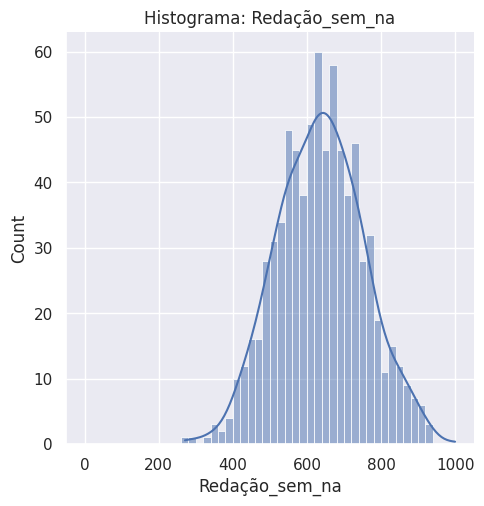

<Figure size 800x1000 with 0 Axes>

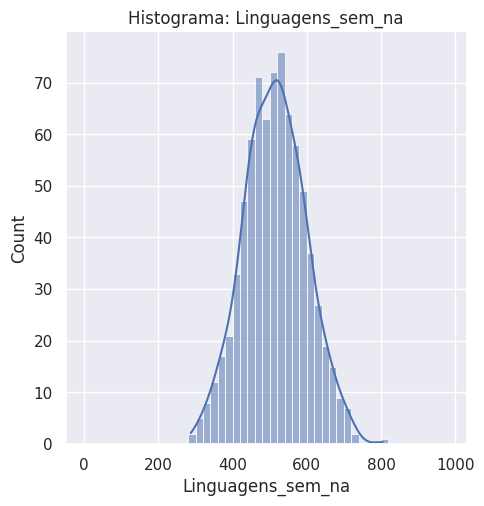

In [29]:
# Plotando o gráfico
plt.rcParams['figure.figsize'] = [8, 10]
sns.set_theme()
for column in ['Redação_sem_na','Linguagens_sem_na']:
   plt.figure()
   sns.displot(df_enem_hist , x = column, kde= True,bins=range(0, 1000, 20))
   plt.title("Histograma: "+column)
   plt.show()

Ambos histogramas foram simétricos

7. Agora coloque um range fixo de 0 até 1000, você ainda tem a mesma
opinião quanto a simetria? [plt.hist(dado, bins=_, range=[0, 1000])


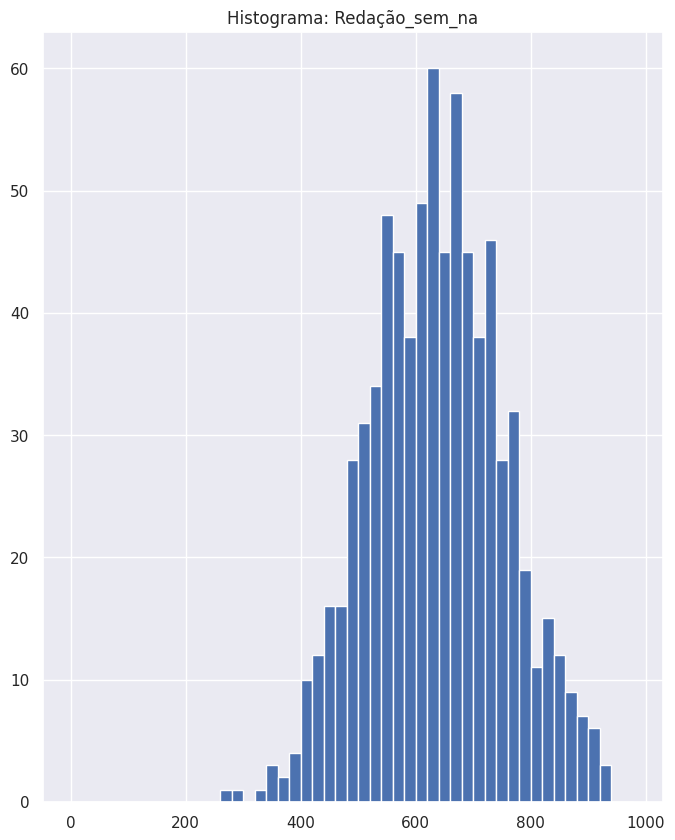

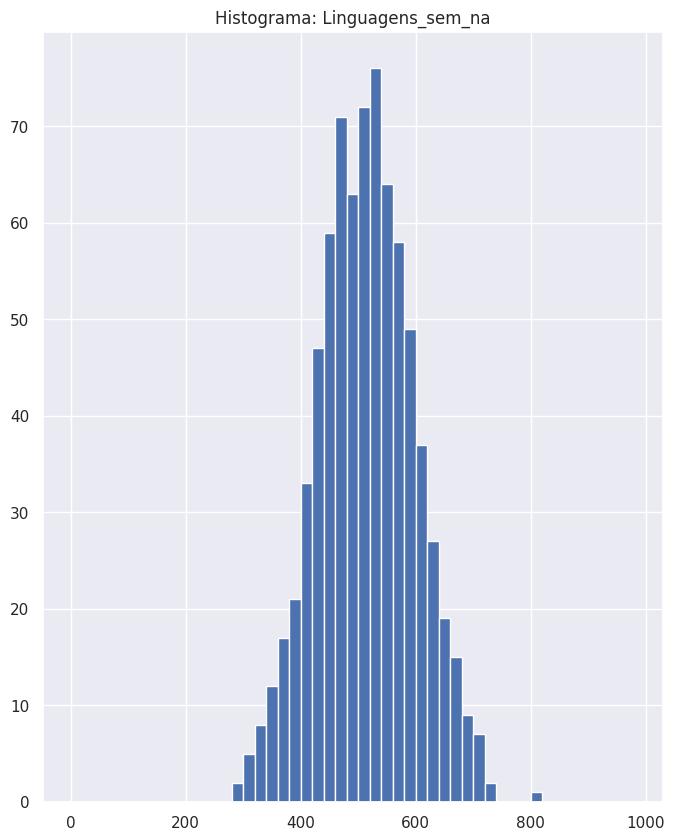

In [31]:
# Plotando o gráfico
plt.rcParams['figure.figsize'] = [8, 10]
sns.set_theme()
for column in ['Redação_sem_na','Linguagens_sem_na']:
   plt.figure()
   plt.hist(df_enem_hist[column], bins=range(0, 1000, 20), range=[0, 1000])
   plt.title("Histograma: "+column)
   plt.show()

Os gráficos continuaram simétricos

8. Faça um boxplot do quartil de todas as disciplinas de ciências da
natureza e redação. É possível enxergar outliers? Utilize o método IQR.


In [32]:
# retirando os NAN da coluna de Ciências da Natureza e Redação
df_box=df_enem[['Redação','Ciências da natureza']]
df_box=df_box.dropna(subset=['Redação','Ciências da natureza'])
df_box=df_box.rename(columns={'Redação':'Redação_box_sem_na','Ciências da natureza':'Ciênc_natureza_box_sem_na'})
df_box


,Redação_box_sem_na,Ciênc_natureza_box_sem_na
0,546.371706,390.482473
2,684.515750,443.183580
3,671.237114,413.979810
4,744.375048,609.758123
5,507.365147,497.777935
...,...,...
993,579.596477,528.010191
994,566.635561,554.934948
996,715.984249,542.028624
997,798.408655,508.034658


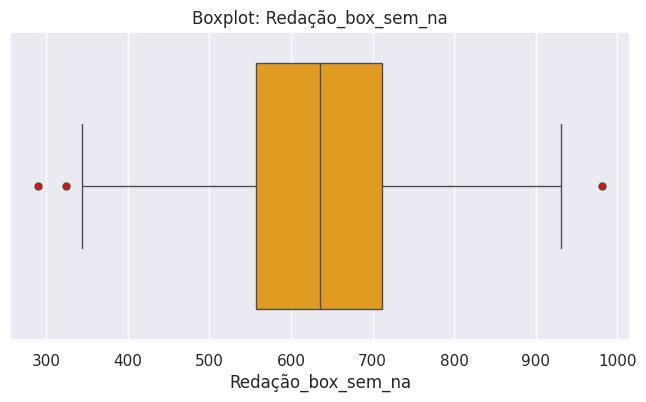

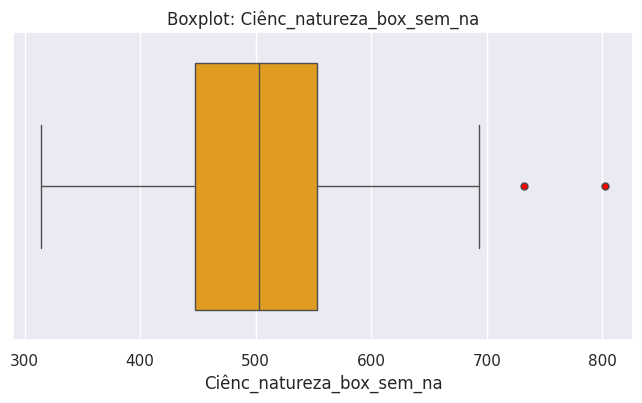

In [33]:
# Plotando os Boxplots
plt.rcParams['figure.figsize'] = [8, 4]
sns.set_theme()
flierprops = dict(marker='o', markerfacecolor='red', markersize=5)
for column in ['Redação_box_sem_na','Ciênc_natureza_box_sem_na']:
    plt.figure()
    sns.boxplot(df_box , x = column, color='orange',showfliers=True, flierprops=flierprops)
    plt.title("Boxplot: "+column)

Através dos boxplots já é possível visualizar os outliers, marcados em vermelho

In [34]:
# Criando uma função que calcula o IQR e a partir dele, localiza os dados que são considerados outliers, e exibe quantos e quais são os outliers de cada coluna, além do valor do IQR
def exibe_outlier_iqr(dataset, colname):
    q25, q75 = np.quantile(dataset[colname], 0.25), np.quantile(dataset[colname], 0.75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    print(' IQR é ',iqr)
    outliers = []

    for i in dataset[colname].values:
      if((i > upper)or(i < lower)):
        outliers.append(i)
    print(f'O numero de outliers encontrado em {colname} foi de,{len(outliers)}:{outliers}')
    return lower, upper, outliers

 IQR é  155.0016325121751
O numero de outliers encontrado em Redação_box_sem_na foi de,3:[290.3086081677, 324.2225532562, 981.0165529826]
 IQR é  105.71203439857504
O numero de outliers encontrado em Ciênc_natureza_box_sem_na foi de,2:[802.0045683513, 732.5029639878]


<Figure size 1000x600 with 0 Axes>

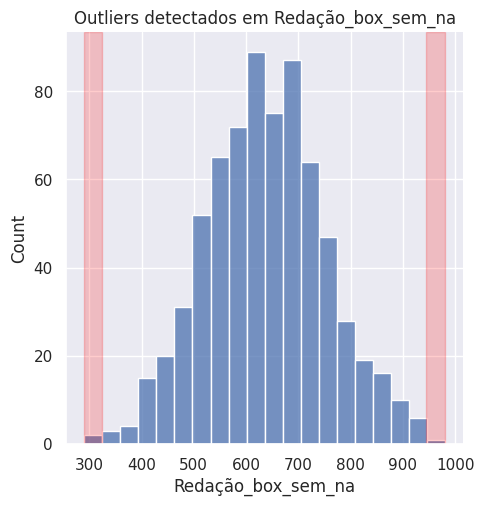

<Figure size 1000x600 with 0 Axes>

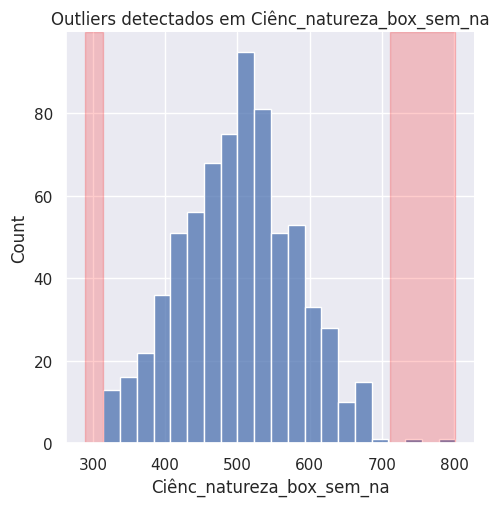

In [35]:
# chamando a função
for column in ['Redação_box_sem_na','Ciênc_natureza_box_sem_na']:
  lower, upper, out =  exibe_outlier_iqr(df_box, column)

  if (len(out) > 0):

    plt.figure(figsize = (10,6))

    sns.displot(df_box[column], kde=False)

    plt.axvspan(xmin = lower,xmax= df_box[column].min(),alpha=0.2, color='red')

    plt.axvspan(xmin = upper,xmax= df_box[column].max(),alpha=0.2, color='red')

    plt.title("Outliers detectados em {}".format(column))


9. Remova todos os outliers e verifique se eles são passíveis de alterar a
média nacional significativamente? (considere significativamente um
valor acima de 5%)


In [37]:
# criando um dataframe apenas com as colunas de Ciências da Natureza e Redação contendo os outliers)
df_media_nacional_outlier=df_enem[['Ciências da natureza','Redação']]
df_media_nacional_outlier

,Ciências da natureza,Redação
0,390.482473,546.371706
1,NaN,741.825256
2,443.183580,684.515750
3,413.979810,671.237114
4,609.758123,744.375048
...,...,...
995,511.347833,NaN
996,542.028624,715.984249
997,508.034658,798.408655
998,414.167228,593.392939


In [38]:
# criando uma cópia do df para posterior retirada dos outliers
df_media_nacional_outlier=df_media_nacional_outlier.copy()

In [39]:
# Calculando a média das colunas Ciências da natureza e Redação, sem retirar os outliers
media_com_outlier=df_media_nacional_outlier.mean()
media_com_outlier

,0
Ciências da natureza,499.315583
Redação,637.783532


In [40]:
# criando uma função que localiza  os outliers através do zscore e retorna o dataframe com os outliers excluídos
def exclui_outlier(dataset, threshold, colnames):
  for colname in colnames:
    df_media_nacional_outlier= dataset[colname]
    mean = np.mean(df_media_nacional_outlier)
    std = np.std(df_media_nacional_outlier, axis=0)

    z_score= (df_media_nacional_outlier - mean)/std
    df_sem_outliers=dataset[np.abs(z_score)<=threshold]


    return df_sem_outliers

In [41]:
# chamando a função
threshold=3
df_sem_outliers=exclui_outlier(df_media_nacional_outlier,threshold,['Ciências da natureza','Redação'])
df_sem_outliers.head()

,Ciências da natureza,Redação
0,390.482473,546.371706
2,443.183580,684.515750
3,413.979810,671.237114
4,609.758123,744.375048
5,497.777935,507.365147


In [42]:
# calculando a média das colunas sem os outliers
media_sem_outliers=df_sem_outliers.mean()
media_sem_outliers

,0
Ciências da natureza,498.947796
Redação,637.966333


In [43]:
# calculando a diferença entre os valores das médias com e sem outliers, e verificando se alteram significativamente o valor da média nacional.

alteracao =(media_com_outlier - media_sem_outliers) / media_com_outlier
for coluna in alteracao.index:
    if abs(alteracao[coluna]) > 0.05:
        print(f"Os outliers alteram significativamente o valor da média na coluna {coluna}.")
    else:
        print(f"Os outliers não alteram significativamente o valor da média na coluna {coluna}.")

Os outliers não alteram significativamente o valor da média na coluna Ciências da natureza.
Os outliers não alteram significativamente o valor da média na coluna Redação.


10. Considerando valores nulos, tente encontrar qual seria a melhor medida
de tendência que pode substituir as notas nulas. Média, moda ou
mediana? Substitua o valor por todos os três e diga qual delas altera
menos a média geral e o desvio padrão

In [44]:
df_sem_nan=df_enem.copy()
df_sem_nan.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem


In [45]:
# calculando a média antes da substituição
g=df_sem_nan.mean(numeric_only=True)
g

,0
Linguagens,514.524809
Ciências humanas,527.042281
Ciências da natureza,499.315583
Matemática,535.965660
Redação,637.783532


In [46]:
# calculando o desvio padrão antes da substituição
h=df_sem_nan.std(numeric_only=True)
h

,0
Linguagens,84.009313
Ciências humanas,77.811519
Ciências da natureza,78.760404
Matemática,86.648100
Redação,115.339972


In [47]:
# verificando a quantidade de nulos por coluna
df_sem_nan.isna().sum()

,0
Linguagens,103
Ciências humanas,64
Ciências da natureza,176
Matemática,76
Redação,140
Sexo,0


In [48]:
# substituindo os nulos pela média
df_substitui_media=df_sem_nan.fillna(df_sem_nan.mean(numeric_only=True))
df_substitui_media.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,499.315583,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem


In [49]:
# cálculo da média após substituir NAN pela média
a=df_substitui_media.mean(numeric_only=True)
a

,0
Linguagens,514.524809
Ciências humanas,527.042281
Ciências da natureza,499.315583
Matemática,535.965660
Redação,637.783532


In [50]:
# cálculo do desvio padrão após substituir NAN pela média
b=df_substitui_media.std(numeric_only=True)
b

,0
Linguagens,79.560718
Ciências humanas,75.277806
Ciências da natureza,71.486677
Matemática,83.286987
Redação,106.953175


In [51]:
# substituindo NAN pela moda
df_substitui_moda=df_sem_nan.fillna(df_sem_nan.mode(numeric_only=True))
df_substitui_moda.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem


In [52]:
# cãlculo da média após substituir NAN pela moda
c=df_substitui_moda.mean(numeric_only=True)
c

,0
Linguagens,514.524809
Ciências humanas,527.042281
Ciências da natureza,499.315583
Matemática,535.965660
Redação,637.815381


In [53]:
# cálculo do desvio padrão após substituir NAN pela moda
d=df_substitui_moda.std(numeric_only=True)
d

,0
Linguagens,84.009313
Ciências humanas,77.811519
Ciências da natureza,78.760404
Matemática,86.648100
Redação,114.038611


In [54]:
# substituindo NAN pela mediana
df_substitui_mediana=df_sem_nan.fillna(df_sem_nan.median(numeric_only=True))
df_substitui_mediana.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,500.479263,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem


In [55]:
# calculando a média após substituir os NAN pela mediana
e=df_substitui_mediana.mean(numeric_only=True)
e

,0
Linguagens,514.578415
Ciências humanas,526.880850
Ciências da natureza,499.520391
Matemática,535.759100
Redação,637.432194


In [56]:
# calculando o desvio padrão após substituir os NAN pela mediana
f=df_substitui_mediana.std(numeric_only=True)
f

,0
Linguagens,79.560876
Ciências humanas,75.280340
Ciências da natureza,71.488051
Matemática,83.290104
Redação,106.956723


In [57]:
# criando um dataframe para comparação dos valores da média antes e após substituição pela Média, Moda e Mediana
df_compara_media= pd.DataFrame({
    'Média Sem Substituição': g,
    'Média Média': a,
    'Média Moda': c,
    'Média Mediana': e
})
df_compara_media

,Média Sem Substituição,Média Média,Média Moda,Média Mediana
Linguagens,514.524809,514.524809,514.524809,514.578415
Ciências humanas,527.042281,527.042281,527.042281,526.880850
Ciências da natureza,499.315583,499.315583,499.315583,499.520391
Matemática,535.965660,535.965660,535.965660,535.759100
Redação,637.783532,637.783532,637.815381,637.432194


In [58]:
# Criação de um dataframe para comparação dos valores do desvio padrão antes e após substituição dos NAN pela Média, Moda e mediana
df_compara_desvio= pd.DataFrame({
    'Desvio Sem Substituição': h,
    'Desvio Média': b,
    'Desvio Moda': d,
    'Desvio Mediana': f
})
df_compara_desvio

,Desvio Sem Substituição,Desvio Média,Desvio Moda,Desvio Mediana
Linguagens,84.009313,79.560718,84.009313,79.560876
Ciências humanas,77.811519,75.277806,77.811519,75.280340
Ciências da natureza,78.760404,71.486677,78.760404,71.488051
Matemática,86.648100,83.286987,86.648100,83.290104
Redação,115.339972,106.953175,114.038611,106.956723


Após análise dos dados, substituir os valores nulos pela moda foi o método que causou menos alteração no valor da média e do desvio padrão antes da substituição.